In [6]:
import pandas as pd
from antifungal.analyze import antifungal_contribution
from time import time

seq = 'HIHIRHMWLLRRR'
afc = antifungal_contribution(seq)
contributions, r2 = afc.get_amino_acid_contribution(n_sampling=1000, seed = 42)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


<AxesSubplot:title={'center':'Antifungal Contribution tests, R2 = 0.07'}, xlabel='Amino acid', ylabel='Antifungal Contribution'>

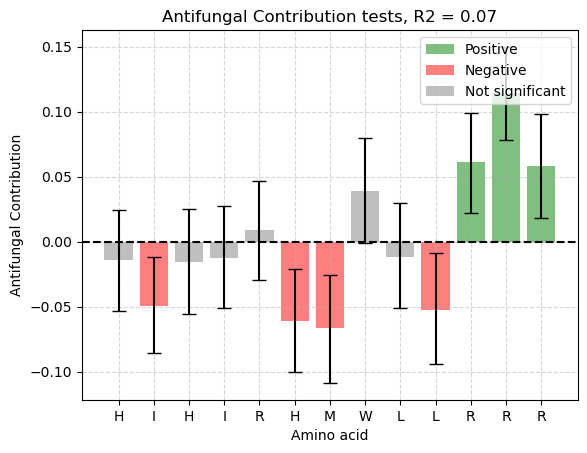

In [7]:
from matplotlib import pyplot as plt
import numpy as np

# Plot contributions
fig, ax = plt.subplots()

afc.plot_contributions(ax = ax)


In [8]:
# Find positions with the  most significantly negative contributions, and perform multi-point mutation analysis
from antifungal.design import multi_point_mutate
smallest_contributions_indices = np.argsort(contributions)[:2]

print(f"The positions of the amino acids with the most significantly negative contributions are: {smallest_contributions_indices + 1}")

multi_mutate_instance = multi_point_mutate(seq)
multi_mutate_instance.get_candidate_sequences(positions=smallest_contributions_indices + 1)
multi_mutate_predictions = multi_mutate_instance.predict()
print(pd.DataFrame(multi_mutate_predictions))


The positions of the amino acids with the most significantly negative contributions are: [7 6]
     antifungal  prob_antifungal  MIC_C_albicans  prob_MIC_C_albicans  \
0          True             98.2           43.18                 99.8   
1          True             99.1           29.67                 99.8   
2         False             44.1           62.55                 99.8   
3          True             86.9           50.88                 99.8   
4          True             96.0           20.86                 99.9   
..          ...              ...             ...                  ...   
395       False             14.5           23.11                 99.8   
396       False             12.1           18.92                 99.8   
397       False             33.3           16.03                 99.8   
398       False             23.6           15.83                 99.8   
399        True             49.2           15.01                 99.8   

     MIC_C_krusei  prob_MIC_

In [22]:
# Based on the the rules of antifungal is ture, and the predicted AFI is smallest, the best candidate sequence is:

# Create a DataFrame from the predictions
df = pd.DataFrame(multi_mutate_predictions)

# Filter the DataFrame to only include rows where 'antifungal' is True
df = df[df['antifungal'] == True]

# Find the row with the smallest 'AFI'
best_sequence = df.iloc[df['AFI'].idxmin()]

print(f"The best sequence and the predictions is: \n{best_sequence}")

The best sequence and the predictions is: 
antifungal                                      True
prob_antifungal                                 96.8
MIC_C_albicans                                 29.44
prob_MIC_C_albicans                             99.8
MIC_C_krusei                                    6.37
prob_MIC_C_krusei                               99.9
MIC_C_neoformans                                7.37
prob_MIC_C_neoformans                           99.8
MIC_C_parapsilosis                             19.31
prob_MIC_C_parapsilosis                         86.7
AFI                                            12.78
prob_AFI                                       83.51
peptide_seq                            HIHIRNCWLLRRR
seq_name                   mutate_M_7_C_mutate_H_6_N
Name: 31, dtype: object
